In [110]:
import sys
sys.path.append("C:\\Users\\11234\\Desktop\\MLChem\\Github\\Mechine-Learning-and-its-Applications-in-Chemistry\\Labs\\Lab1")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nci_birman = pd.read_csv("C:\\Users\\11234\\Desktop\\MLChem\\Github\\Mechine-Learning-and-its-Applications-in-Chemistry\\Labs\\Lab1\\nci_birman.csv", sep='\t')
nci_birman

,d_pi_d,d_pi_D,e_pi_d,e_pi_D,L_Alk,B1_Alk,B5_Alk,L_Ar,B1_Ar,B5_Ar,er(%)
0,3.54,3.54,-10.24,-10.24,4.36,2.92,3.35,6.38,1.77,3.15,1.71
1,3.54,3.54,-10.24,-10.24,4.35,2.09,3.34,6.38,1.77,3.15,3.36
2,3.54,3.54,-10.24,-10.24,4.38,1.73,3.33,6.38,1.77,3.15,3.78
3,3.54,3.54,-10.24,-10.24,3.08,1.70,2.20,6.38,1.77,3.15,5.03
4,3.49,3.49,-11.88,-11.88,3.08,1.70,2.20,6.38,1.88,4.52,5.03
5,3.51,3.51,-11.78,-11.78,3.08,1.70,2.20,6.63,1.83,4.41,4.87
6,3.48,3.49,-13.31,-12.31,3.08,1.70,2.20,7.23,1.82,4.64,3.97
7,3.50,3.50,-11.12,-10.05,3.08,1.70,2.20,6.38,1.77,4.71,4.18
8,3.56,3.56,-13.94,-13.94,3.08,1.70,2.20,7.42,1.93,4.55,6.38
9,3.41,3.46,-14.33,-15.74,3.08,1.70,2.20,6.41,1.77,5.62,2.52


In [111]:
from typing import Tuple
import numpy as np

R = 8.314    # ideal gas constant
kcal_to_kj = 4.184    # unit conversion

def prepare_data(in_df: pd.DataFrame, temperature: float=298.0) -> Tuple[pd.DataFrame, pd.Series]:

    def weight_calculate(E1: pd.DataFrame, E2: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
        c1 = np.exp(-E1 * 1000 * kcal_to_kj / (R * temperature))
        c2 = np.exp(-E2 * 1000 * kcal_to_kj / (R * temperature))
        w1 = c1 / (c1 + c2)
        w2 = c2 / (c1 + c2)
        return w1, w2
    
    def DDG_calculate(df_er: pd.DataFrame) -> pd.Series:
        ddG = -0.001 * R * temperature * np.log(df_er/100) / kcal_to_kj
        return ddG

    df_de = in_df.iloc[:, :4]
    df_sterimol = in_df.iloc[:, 4:-1]
    df_er = in_df.iloc[:, -1]

    w1, w2 = weight_calculate(df_de.iloc[:, 2], df_de.iloc[:, 3])

    d_pi_w = df_de.iloc[:, 0] * w1 + df_de.iloc[:, 1] * w2
    d_pi_w.name = 'd_pi_w'
    e_pi_w = df_de.iloc[:, 2] * w1 + df_de.iloc[:, 3] * w2
    e_pi_w.name = 'e_pi_w'
    de_pi_w = d_pi_w * e_pi_w
    de_pi_w.name = 'de_pi_w'

    df = pd.concat([d_pi_w, e_pi_w, de_pi_w, df_sterimol], axis=1)

    delta_delta_G = DDG_calculate(df_er)
    delta_delta_G.name = 'delta_delta_G'

    return df, delta_delta_G

In [112]:
X, y_true = prepare_data(nci_birman)
X.iloc[:5, :], y_true[:5]

(   d_pi_w  e_pi_w  de_pi_w  L_Alk  B1_Alk  B5_Alk  L_Ar  B1_Ar  B5_Ar
 0    3.54  -10.24 -36.2496   4.36    2.92    3.35  6.38   1.77   3.15
 1    3.54  -10.24 -36.2496   4.35    2.09    3.34  6.38   1.77   3.15
 2    3.54  -10.24 -36.2496   4.38    1.73    3.33  6.38   1.77   3.15
 3    3.54  -10.24 -36.2496   3.08    1.70    2.20  6.38   1.77   3.15
 4    3.49  -11.88 -41.4612   3.08    1.70    2.20  6.38   1.88   4.52,
 0    2.409283
 1    2.009314
 2    1.939568
 3    1.770392
 4    1.770392
 Name: delta_delta_G, dtype: float64)

## 测试

In [113]:
### CAUTION: DO NOT MODIFY THIS CELL. ###

test_in_df = pd.concat([
    pd.DataFrame({
        "d_pi_d": [4.89, 4.91, 6.48, 7.00],
        "d_pi_D": [7.00, 7.21, 7.22, 7.20],
        "e_pi_d": [-3.48, -2.98, -1.80, -1.45],
        "e_pi_D": [-1.48, -2.00, -1.96, -2.26]
    }),
    nci_birman.iloc[:4, 4:]
], axis=1)

test_labels = np.array([2.409283, 2.009314, 1.939568, 1.770392])
test_weighted_features = np.array([
    [4.959643, -3.413988, -16.932160],
    [5.279007, -2.822771, -14.901427],
    [6.899685, -1.890743, -13.045529],
    [7.159408, -2.095601, -15.003264]
])

def test_prepare_data_names(in_df):
    X_, y_true_ = prepare_data(in_df)
    assert set(X.columns) == {"d_pi_w", "e_pi_w", "de_pi_w", "L_Alk", "B1_Alk", "B5_Alk", "L_Ar", "B1_Ar", "B5_Ar"}, "wrong column names."
    assert y_true_.name == "delta_delta_G", "wrong label name."

def test_prepare_data_labels(in_df, labels):
    _, y_true_ = prepare_data(in_df)
    np.testing.assert_allclose(
        y_true_, labels, rtol=1.0e-3,
        err_msg="wrong label values."
    )

def test_prepare_data_weighted_features(in_df, weighted_features):
    X_, _ = prepare_data(in_df)
    np.testing.assert_allclose(
        X_.loc[:, ["d_pi_w", "e_pi_w", "de_pi_w"]], weighted_features, rtol=1.0e-3,
        err_msg="wrong weighted feature values."
    )
    
try:
    test_prepare_data_names(test_in_df)
    print("names: PASSED")
except Exception as err:
    print(err)

try:
    test_prepare_data_labels(test_in_df, test_labels)
    print("labels: PASSED")
except Exception as err:
    print(err)

try:
    test_prepare_data_weighted_features(test_in_df, test_weighted_features)
    print("weighted features: PASSED")
except Exception as err:
    print(err)

names: PASSED
labels: PASSED
weighted features: PASSED


## 拆分与归一化
$\quad$原数据没有直接分出训练集和测试集, 我们可以用[`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn-model-selection-train-test-split)对数据集进行手动拆分.

$\quad$**任务2**: 将28个样本先按照23:5的份额划分训练集与测试集, 再在**各个数据集上**分别对特征作均值-方差归一化:

$$
x_n' := \frac{x_n - \mathrm{Mean}_{n=1}^N(x)}{\mathrm{Std}_{n=1}^N(x)},\,n=1,\dots,N,
$$

返回(归一化后的)训练集与测试集.

- **任务2.1**: 完成函数`split_and_normalize()`的编写, 输入:
  - 原始数据集的特征`X`与标签`y_true`;
  - 测试集大小`test_size`(默认为5).
- 返回拆分好的`X_train`, `X_test`, `y_true_train`, `y_true_test`, 其中, `X_train`与`X_test`进行了归一化处理.
- **任务2.2**: 在以下代码块的注释区回答问题: 为什么均值-方差归一化需要在训练集和测试集上分开进行? 如果先归一化再拆分, 会导致什么后果?

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_and_normalize(
    X: pd.DataFrame, y_true: pd.Series, test_size: int=5
) -> Tuple[np.array, np.array, np.array, np.array]:
    # 将28个样本先按照23:5的份额划分训练集与测试集, 再在**各个数据集上**分别对特征作均值-方差归一化:

    X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=test_size)
    scaler_1 = StandardScaler()
    scaler_2 = StandardScaler()

    # 特征作均值-方差归一化，并且均值为0，方差为1
    X_train_scaled = scaler_1.fit_transform(X_train)
    X_test_scaled = scaler_2.fit_transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

### 任务2.2答题区(另起一行时请记得加注释符号#) ###
### BEGIN YOUR SOLUTION ###
#
### END YOUR SOLUTION ###

In [115]:
X_train, X_test, y_true_train, y_true_test = split_and_normalize(X, y_true)


In [116]:
n_samples, n_features, test_size = 40, 9, 7
test_X = np.random.randn(n_samples, n_features)
test_y_true = np.random.randn(n_samples)

def test_split_and_normalize_shapes(X, y_true):
    X_train_, X_test_, y_true_train_, y_true_test_ = split_and_normalize(X, y_true, test_size=test_size)
    assert (X_train_.shape, X_test_.shape) == ((n_samples - test_size, 9), (test_size, 9)), "wrong X shape."
    assert (*y_true_train_.shape, *y_true_test_.shape) == (n_samples - test_size, test_size), "wrong y_true shape."

def test_split_and_normalize_normalized(X, y_true):
    X_train_, X_test_, _, _ = split_and_normalize(X, y_true)
    np.testing.assert_allclose(
        X_train_.mean(axis=0), np.zeros(n_features), atol=1.0e-5,
        err_msg="invalid X_train normalization: non-zero mean."
    )
    np.testing.assert_allclose(
        X_test_.mean(axis=0), np.zeros(n_features), atol=1.0e-5,
        err_msg="invalid X_test normalization: non-zero mean."
    )
    np.testing.assert_allclose(
        X_train_.std(axis=0), np.ones(n_features), rtol=1.0e-3,
        err_msg="invalid X_train normalization: non-unit std."
    )
    np.testing.assert_allclose(
        X_test_.std(axis=0), np.ones(n_features), rtol=1.0e-3,
        err_msg="invalid X_test normalization: non-unit std."
    )

try:
    test_split_and_normalize_shapes(test_X, test_y_true)
    print("shapes after split: PASSED")
except Exception as err:
    print(err)

try:
    test_split_and_normalize_normalized(test_X, test_y_true)
    print("normalization: PASSED")
except Exception as err:
    print(err)

shapes after split: PASSED
normalization: PASSED


## 2.2

在机器学习中，均值-方差归一化（常被称为标准化或z-score归一化）需要在训练集和测试集上分开进行，主要基于以下几点考虑：

1. **信息泄露**：如果你在拆分数据集之前进行归一化，那么测试集的信息就被用于了训练集的归一化计算，从而导致了训练集和测试集之间的信息泄露。在现实场景中，测试集应当模拟未来的、未知的数据，因此在模型训练阶段，你不应当有关于测试集的任何信息。

2. **模拟实际情境**：在真实应用中，当你有了新的数据并希望使用模型进行预测时，你不可能知道整个数据集的均值和标准差。因此，使用训练集的均值和标准差来标准化测试数据更能模拟真实的使用情境。

3. **保持评估的公正性**：如果测试数据参与了训练数据的归一化计算，那么在评估模型时可能会获得一个不真实、过于乐观的评估结果。这是因为模型可能间接地“看到”了测试数据。

如果你先进行归一化再进行数据拆分，可能会导致以下后果：

1. **评估偏差**：如上所述，这样的做法可能会导致模型的评估结果过于乐观。
  
2. **模型泛化能力下降**：由于模型训练过程中间接地使用了测试集的信息，所以它可能在训练集上表现得很好，但在其他未知数据上的表现就可能不尽如人意。

3. **不稳定的归一化参数**：如果经常使用新数据进行模型评估，每次使用整个数据集的均值和标准差进行归一化可能会导致归一化参数的不稳定，进而影响模型的稳定性。

总之，为了防止信息泄露和确保模型评估的准确性，最好在拆分数据集之后再进行归一化，并且只使用训练集的均值和标准差来标准化测试集。

In [117]:
from sklearn.linear_model import LinearRegression

def train_model(X_train, y_true_train) -> object:
    model = LinearRegression()
    model.fit(X_train, y_true_train)
    return model

In [118]:
from sklearn.metrics import mean_squared_error
lr = train_model(X_train, y_true_train)
mean_squared_error(lr.predict(X_train), y_true_train)

0.006749095560712323

In [119]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

def plot_prediction(y_true: np.array, y_pred: np.array):
    r2 = r2_score(y_true, y_pred)
    # text annotation setup
    plt.title(r"True values vs predicted values ($R^2$ = " + f"{r2:.4f}" + ")")
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    # plot the scatter and line
    plt.scatter(y_true, y_pred, c="red", marker="o")
    plt.plot(y_true, y_true, "b--")
    # show the plot!
    plt.show()


In [120]:
def evaluate_model(model, X, y_true, mode: str):
    y_pred = model.predict(X)
    if mode == "plot":
        plot_prediction(y_true, y_pred)
    elif mode == "metrics":
        r2 = r2_score(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred)
        return rmse, r2
    else:
        raise ValueError("invalid mode.")

In [121]:
def evaluate(model, X_train, y_true_train, X_test, y_true_test):
    evaluate_model(model, X_train, y_true_train, mode="plot")
    RMSE, r2 = evaluate_model(model, X_test, y_true_test, mode="metrics")
    print(f"RMSE: {RMSE}")
    print(f"r2: {r2}")
    evaluate_model(model, X_test, y_true_test, mode="plot")

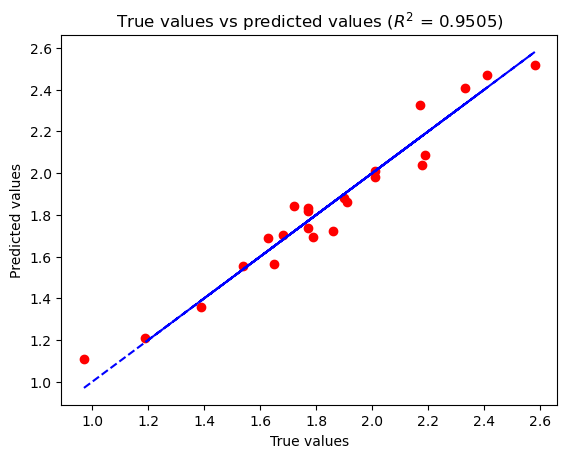

RMSE: 0.482605535847603
r2: -4.480639525943192


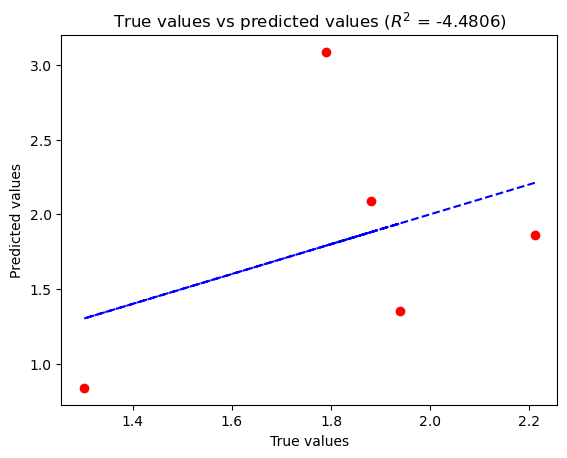

In [122]:
lr = train_model(X_train, y_true_train)
evaluate(lr, X_train, y_true_train, X_test, y_true_test)

**主成分分析 PCA**是一种非常流行的降维技术，主要用于高维数据集。以下是PCA的详细介绍：

### 1. 目标：
PCA的主要目标是减少数据集的维数，同时保留数据中的主要信息。

### 2. 工作原理：
1. **方差的最大化**：PCA试图找到一个方向（或者称为主成分），在这个方向上数据的方差最大。换句话说，PCA试图找到能够最好地解释数据分布的方向。
2. **正交性**：找到第一个主成分后，PCA会寻找与之正交的第二个方向，该方向具有数据的次大方差，依此类推，直到找到与数据维度相等的方向。

### 3. 步骤：
1. **中心化数据**：减去每个特征的平均值。
2. **计算协方差矩阵**：对于中心化后的数据，计算其协方差矩阵。
3. **计算特征值和特征向量**：得到协方差矩阵的特征值和特征向量。
4. **排序**：根据特征值大小对特征向量进行排序。
5. **选择主成分**：根据需要保留的信息量（或者降低到的维度）选择前k个主成分。
6. **转换数据**：将原始数据投影到选定的主成分上，得到降维后的数据。

### 4. 优势：
1. **数据压缩**：PCA可以大大减少所需的存储空间和计算时间。
2. **可视化**：将高维数据降低到2或3维，可以方便地进行可视化。
3. **去噪**：投影到较低维空间可以减少噪声。

### 5. 缺点：
1. **解释性降低**：降维后的特征不再与原始特征直接对应，这可能会使模型的解释性降低。
2. **信息损失**：虽然PCA试图最大限度地保留数据中的变异，但降维仍然可能导致一些信息的损失。

### 6. 总结：
PCA是一个线性技巧，用于从高维数据中提取关键信息。它在许多应用领域，如图像处理、机器学习和统计建模中都有广泛应用。但是，它假设数据的主要结构是线性的，因此对于某些问题（特别是那些涉及非线性关系的问题），其他降维技术可能更为合适。

# PCA

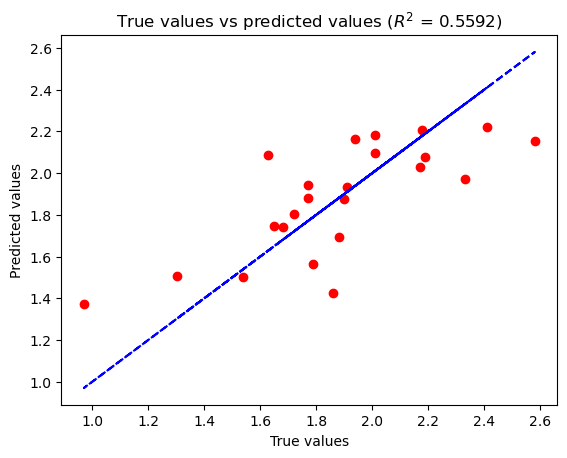

RMSE: 0.06376946610581707
r2: 0.4903620524569111


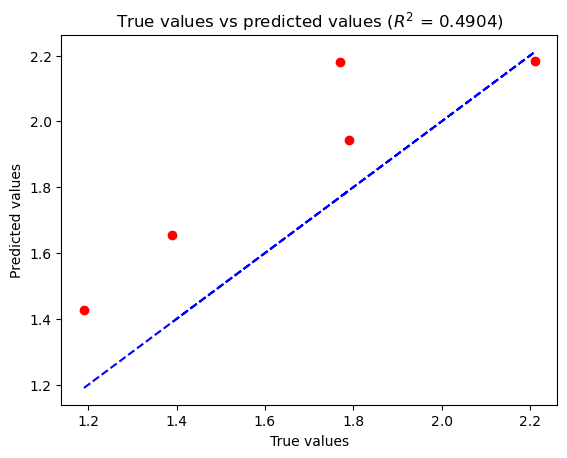

'plt.figure(figsize=(15, 6))\n\n# 原始数据的前两个特征绘制\nplt.subplot(1, 2, 1)\nplt.scatter(X[\'d_pi_w\'], X[\'e_pi_w\'], color=\'blue\', marker=\'o\')\nplt.title("Original Data (First two features)")\n\n# PCA转换后的数据绘制\nplt.subplot(1, 2, 2)\nplt.scatter(X_pca[:, 0], X_pca[:, 1], color=\'red\', marker=\'o\')\nplt.title("Data after PCA")\n\nplt.tight_layout()\nplt.show()'

In [123]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 创建数据集


# 执行PCA
pca = PCA(n_components=4) # 将数据降到2维
X_pca = pca.fit_transform(X)

# 拆分数据
X_train_pca, X_test_pca, y_true_train_pca, y_true_test_pca = split_and_normalize(X_pca, y_true)

# 训练模型
lr_pca = train_model(X_train_pca, y_true_train_pca)

# 评估模型
evaluate(lr_pca, X_train_pca, y_true_train_pca, X_test_pca, y_true_test_pca)


# 可视化原始数据和PCA转换后的数据
'''plt.figure(figsize=(15, 6))

# 原始数据的前两个特征绘制
plt.subplot(1, 2, 1)
plt.scatter(X['d_pi_w'], X['e_pi_w'], color='blue', marker='o')
plt.title("Original Data (First two features)")

# PCA转换后的数据绘制
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='red', marker='o')
plt.title("Data after PCA")

plt.tight_layout()
plt.show()'''


# Lasson & Ridge

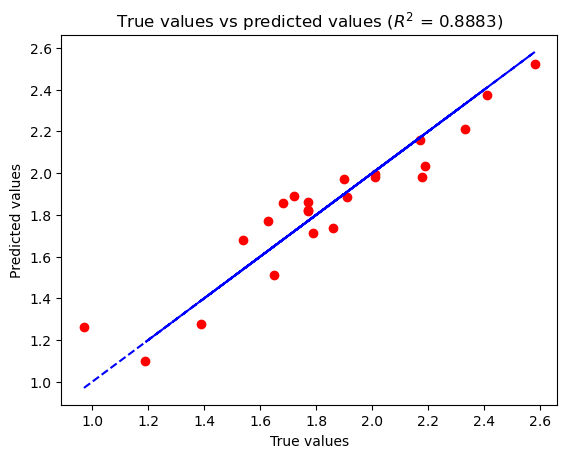

RMSE: 0.014919463148475759
r2: 0.8305692882412152


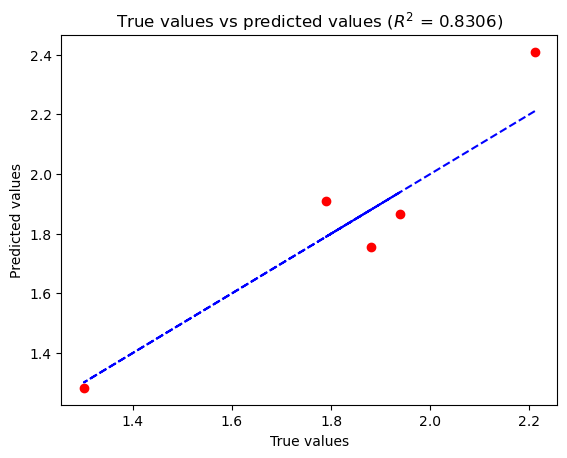

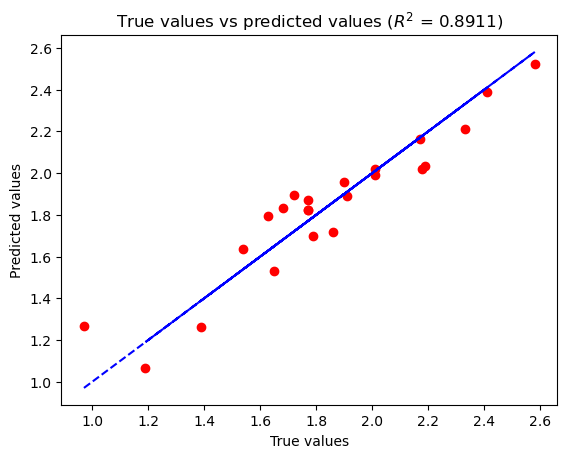

RMSE: 0.013979175059271065
r2: 0.8412475330699197


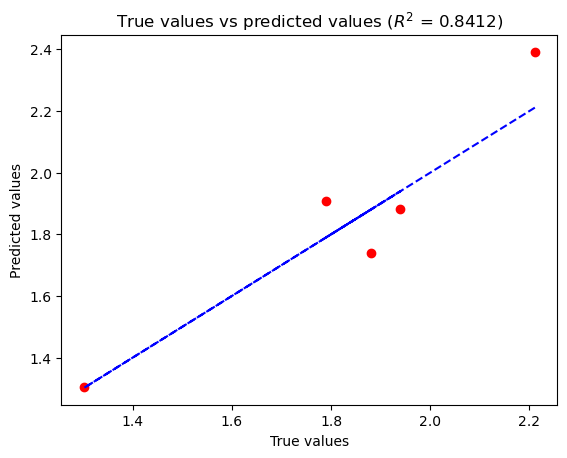

In [124]:
# X_train, X_test, y_true_train, y_true_test

from sklearn.linear_model import Ridge, Lasso, ElasticNet

def train_model(X_train, y_true_train, alpha: float=1.0, model_type: str="ridge") -> object:
    if model_type == "ridge":
        model = Ridge(alpha=alpha)
    elif model_type == "lasso":
        model = Lasso(alpha=alpha)
    else:
        raise ValueError("invalid model type.")
    model.fit(X_train, y_true_train)
    return model

lasso = train_model(X_train, y_true_train, alpha=0.01, model_type="lasso")
evaluate(lasso, X_train, y_true_train, X_test, y_true_test)

ridge = train_model(X_train, y_true_train, alpha=1, model_type="ridge")
evaluate(ridge, X_train, y_true_train, X_test, y_true_test)




# 特征选择

## 方差

In [125]:
from sklearn.feature_selection import VarianceThreshold

def select_features(X: pd.DataFrame, threshold: float=0.0) -> pd.DataFrame:
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X)
    return X_selected

threshold = 0.1
X_variance_selected = select_features(X, threshold=threshold)
print(X)
print(X_variance_selected)

      d_pi_w     e_pi_w    de_pi_w  L_Alk  B1_Alk  B5_Alk  L_Ar  B1_Ar  B5_Ar
0   3.540000 -10.240000 -36.249600   4.36    2.92    3.35  6.38   1.77   3.15
1   3.540000 -10.240000 -36.249600   4.35    2.09    3.34  6.38   1.77   3.15
2   3.540000 -10.240000 -36.249600   4.38    1.73    3.33  6.38   1.77   3.15
3   3.540000 -10.240000 -36.249600   3.08    1.70    2.20  6.38   1.77   3.15
4   3.490000 -11.880000 -41.461200   3.08    1.70    2.20  6.38   1.88   4.52
5   3.510000 -11.780000 -41.347800   3.08    1.70    2.20  6.63   1.83   4.41
6   3.481559 -13.154060 -45.796640   3.08    1.70    2.20  7.23   1.82   4.64
7   3.500000 -10.969124 -38.391934   3.08    1.70    2.20  6.38   1.77   4.71
8   3.560000 -13.940000 -49.626400   3.08    1.70    2.20  7.42   1.93   4.55
9   3.455769 -15.620682 -53.981468   3.08    1.70    2.20  6.41   1.77   5.62
10  3.540000 -14.300000 -50.622000   3.08    1.70    2.20  8.54   2.10   4.04
11  3.633040 -13.062459 -47.456432   3.08    1.70    2.20  8.58 

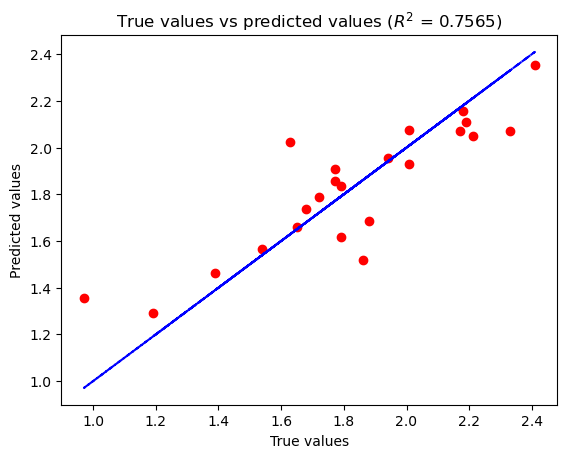

RMSE: 0.049379230522525394
r2: 0.7054086191167386


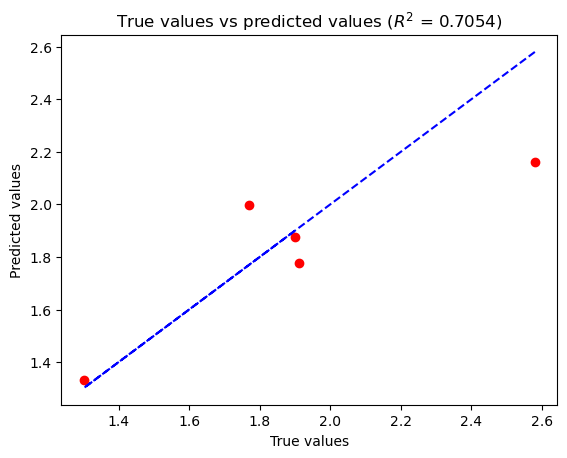

In [126]:
X_train_variance_selected, X_test_variance_selected, y_true_train, y_true_test = split_and_normalize(X_variance_selected, y_true)

lr_variance = train_model(X_train_variance_selected, y_true_train)

evaluate(lr_variance, X_train_variance_selected, y_true_train, X_test_variance_selected, y_true_test)

## Random Forest

In [127]:
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=5)
clf = clf.fit(X, y_true)

model_selector = SelectFromModel(clf, prefit=True)
X_selected = model_selector.transform(X)

# 输出选中的特征
selected_features = X.columns[model_selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['d_pi_w'], dtype='object')


c:\Users\11234\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# 体积特征？

In [128]:
df_X__ = X.iloc[:, :3].copy()

df_alk = X.iloc[:, 3:6].prod(axis=1)
df_alk.name = "V_alk"
df_ar = X.iloc[:, 7:10].prod(axis=1)
df_ar.name = "V_ar"

X_V = pd.concat([df_X__, df_alk, df_ar], axis=1)
X_V

,d_pi_w,e_pi_w,de_pi_w,V_alk,V_ar
0,3.540000,-10.240000,-36.249600,42.649520,5.5755
1,3.540000,-10.240000,-36.249600,30.365610,5.5755
2,3.540000,-10.240000,-36.249600,25.232742,5.5755
3,3.540000,-10.240000,-36.249600,11.519200,5.5755
4,3.490000,-11.880000,-41.461200,11.519200,8.4976
5,3.510000,-11.780000,-41.347800,11.519200,8.0703
6,3.481559,-13.154060,-45.796640,11.519200,8.4448
7,3.500000,-10.969124,-38.391934,11.519200,8.3367
8,3.560000,-13.940000,-49.626400,11.519200,8.7815
9,3.455769,-15.620682,-53.981468,11.519200,9.9474


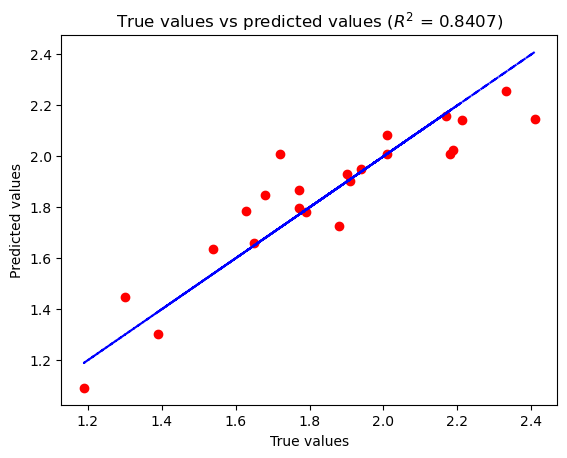

RMSE: 0.0742150004516386
r2: 0.7148315732683305


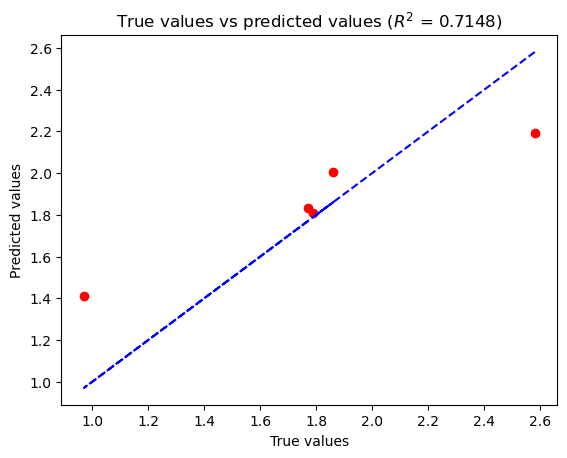

In [129]:
X_train_V, X_test_V, y_true_train, y_true_test = split_and_normalize(X_V, y_true)

lr_V = train_model(X_train_V, y_true_train) 
evaluate(lr_V, X_train_V, y_true_train, X_test_V, y_true_test)

## K交叉验证 K-fold cross validation 

In [130]:
from sklearn.model_selection import KFold, cross_val_score

def cross_validate(model, X, y_true, n_splits: int=5):
    kf = KFold(n_splits=n_splits)
    scores = cross_val_score(model, X, y_true, cv=kf, scoring="neg_mean_squared_error")
    return scores

scores = cross_validate(lr, X, y_true)

print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {np.mean(scores)}")


Cross-validation scores: [-0.00723924 -0.0279622  -0.04282856 -0.05478186 -0.02753258]
Average cross-validation score: -0.0320688887519832
